Objectif: Il s’agit de prédire le prix de biens immobiliers en fonction d’informations concernant l’environnement en utilisant le dataset `BOSTON`. 
Pour plus d'information : [boston](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

In [63]:
#Chargement des bibliothèques
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [64]:
#Chargement des données
boston = pd.read_csv('boston.csv')
boston.head()  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [65]:
boston.shape

(506, 13)

In [66]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [67]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [68]:
# afficher les noms des variables explicatives (“feature”) 
boston.columns

Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

# Régression linéaire simple

## $$f(X)=aX+b $$

In [69]:
# Dans un premier temps, nous estimons le prix d'une maison 
#en utilisant une seule variable soit 'RM'
X = boston[['RM']]
y = boston[['MEDV']]
print(X.shape)
print(X.shape)

(506, 1)
(506, 1)


In [70]:
# chargement du modèle LinearRegression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=3)

In [71]:
#Créer une instance linreg1 
linreg1 = LinearRegression()
#Entrainer linreg1 avec les sous-ensembles d'apprentissage puis caluler le test_score de linreg1
# Entrainer le modèle 
linreg1.fit(X_train, y_train)
#Aficcher l'intercept de linreg1
linreg1.intercept_
#Afficher les coefficients de linreg1
linreg1.coef_

array([[9.01161594]])

### Les metriques d'un algorithme de regression
$$ R2 =1- \frac{\sum  (y_{vrai} - y_{pred} )^2}{\sum  (y_{vrai} - \overline{ y_{vrai}} )^2}  $$
$$ MAE = \frac{1}{m} \sum \lvert y_{vrai} - y_{pred} \rvert $$
$$ MSE = \frac{1}{m} \sum  (y_{vrai} - y_{pred} )^2 $$
$$ RMSE = \sqrt {\frac{1}{m} \sum  (y_{vrai} - y_{pred} )^2 }$$
$$MedianAE =median{\lvert y_{vrai} - y_{pred} \rvert} $$

In [72]:
#Evaluation de la prédiction
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
y_pred = linreg1.predict(X_test)
print('test_score = ',linreg1.score(X_test,y_test)) 
print('R2 = ',r2_score(y_test, y_pred))
print('MAE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('MeadianAE = ', median_absolute_error(y_test, y_pred))

test_score =  0.5721625318143686
R2 =  0.5721625318143686
MAE =  35.405605378778255
RMSE =  5.950260950477571
MAE =  4.365257521734309
MeadianAE =  3.2136662246741805


In [73]:
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
R2Adj = 1-(1-r2_score(y_test, y_pred))*(506-1)/(506-1-1)
print('R2 Adjusted = ',R2Adj)



R2 Adjusted =  0.5713136479489209


Text(0.5, 1.0, 'Actuals vs Regression Line')

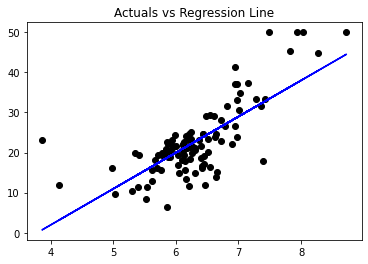

In [74]:
#Plot Our Actual and Predicted Values
plt.plot(X_test, y_test, 'o', color='black');
plt.plot(X_test,y_pred,color='blue')
plt.title("Actuals vs Regression Line")

In [75]:
import statsmodels.api as sm
est = sm.OLS(y_test, X_test)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              1052.
Date:                Tue, 15 Dec 2020   Prob (F-statistic):                    3.28e-55
Time:                        21:58:06   Log-Likelihood:                         -347.27
No. Observations:                 102   AIC:                                      696.5
Df Residuals:                     101   BIC:                                      699.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
#YOUFA HOUNI EL REGRESSION

# Régression linéaire multiple

## $$f(X_1,X_2,...)= a_0 + a_1*X_1 + a_2*X_2 + .... + a_{12}*X12$$

In [76]:
X = boston.drop('MEDV', axis=1)
y = boston[['MEDV']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=3)

In [77]:
#Régression linéaire multiple (toutes les variables de Boston) 
linreg2 = LinearRegression(fit_intercept= True, normalize=False) 
#pour imposer une ordonnée à l'origine (Par défaut ='True')
# Normalisation des données normalize=True
linreg2.fit(X_train, y_train)
y_pred = linreg2.predict(X_test)

print('test_score = ',linreg2.score(X_test,y_test)) 
print('R2 = ',r2_score(y_test, y_pred))
print('MAE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('MeadianAE = ', median_absolute_error(y_test, y_pred))

print('Intercept = ', linreg2.intercept_)
print('Coefficients : ',linreg2.coef_)

test_score =  0.7939670979504738
R2 =  0.7939670979504738
MAE =  17.050212212467905
RMSE =  4.129190261112693
MAE =  3.014140203607046
MeadianAE =  2.189929292326429
Intercept =  [41.71801439]
Coefficients :  [[-1.36030883e-01  4.91228973e-02 -5.71075834e-02  3.58328502e+00
  -1.65787614e+01  3.37070733e+00 -5.89271816e-03 -1.49182712e+00
   2.79551096e-01 -1.10632713e-02 -8.87534865e-01 -5.13568824e-01]]


Text(0, 0.5, 'Residual')

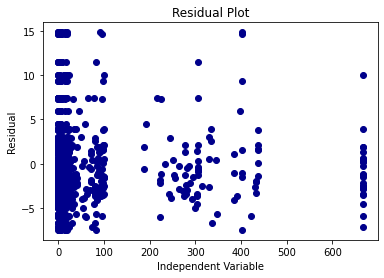

In [78]:
residuals = y_test-y_pred
plt.plot(X_test,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

In [79]:
import statsmodels.api as sm
est1 = sm.OLS(y_test, X_test)
est2 = est1.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              274.3
Date:                Tue, 15 Dec 2020   Prob (F-statistic):                    2.52e-65
Time:                        21:58:15   Log-Likelihood:                         -286.52
No. Observations:                 102   AIC:                                      597.0
Df Residuals:                      90   BIC:                                      628.5
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Sélection de variables

In [80]:
# Define the X (inputs) and y (target) features
X = boston.drop("MEDV", axis=1)
y = boston["MEDV"]

In [81]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [82]:
#Centrage-réduction des données des données
#sc = StandardScaler()
#X_sc = sc.fit_transform(X)
#X = pd.DataFrame(X_sc, columns=X.columns)
#X.head()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(X_train.shape)
print(X_test.shape)

(404, 12)
(102, 12)


**VarianceThreshold** removes features with a variance less than the specified threshold. Consider a feature that takes the same value for all the observations (rows) in the dataset. It would not add any informative power to a model. Using this feature also adds an unnecessary computation burden. Thus, we should just eliminate it from the dataset.

In [84]:
# Variance de chaque variable
X.var()

CRIM          73.986578
 ZN          543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
LSTAT         50.994760
dtype: float64

In [85]:
# Perform feature selection using a variance threshold

from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.02))
sel.fit(X_train)

print("Sélection de variables :", sel.get_support())
print("Variables sélectionnées :", list(X.columns[sel.get_support()]))
print("Variables supprimées :", list(X.columns[~sel.get_support()]))

Sélection de variables : [ True  True  True  True False  True  True  True  True  True  True  True]
Variables sélectionnées : ['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
Variables supprimées : ['NOX']


In [86]:
# Suppression de variables à faible variance
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('test_score = ',model.score(X_test,y_test)) 
print('R2 = ',r2_score(y_test, y_pred))
print('MAE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('Meadian = ', median_absolute_error(y_test, y_pred))


test_score =  0.7693483320954275
R2 =  0.7693483320954275
MAE =  19.08753332993048
RMSE =  4.368928167174471
MAE =  3.1513652640657743
Meadian =  2.511628383143437


## Selection de variables avec `SelectKBest`

It takes as a parameter a score function, which must be applicable to a pair (X, y). The score function must return an array of scores, one for each feature X[:,i] of X

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(X_train.shape)
print(X_test.shape)

(404, 12)
(102, 12)


In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif      
from sklearn.feature_selection import f_regression  
#Score function:
#For regression: f_regression, mutual_info_regression
#For classification: chi2, f_classif, mutual_info_classif

kbest = SelectKBest(score_func=f_regression, k=3)
kbest.fit(X_train, y_train)
print("Sélection de variables :", kbest.get_support())
print("Scores de variables :", kbest.scores_)
print("Variables sélectionnées:", list(X.columns[kbest.get_support()]))
print("Variables supprimées :", list(X.columns[~kbest.get_support()]))

Sélection de variables : [False False  True False False  True False False False False False  True]
Scores de variables : [ 69.32607475  61.471421   134.32222259  25.30149275  89.893855
 344.39434272  73.80483069  27.27794661  63.59031524 108.45903872
 129.00041566 467.16420955]
Variables sélectionnées: ['INDUS ', 'RM', 'LSTAT']
Variables supprimées : ['CRIM', ' ZN ', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']


In [89]:
X_train = kbest.transform(X_train)
X_test = kbest.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('test_score = ',model.score(X_test,y_test)) 
print('R2 = ',r2_score(y_test, y_pred))
print('MAE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('Meadian = ', median_absolute_error(y_test, y_pred))


test_score =  0.7019405174428994
R2 =  0.7019405174428994
MAE =  24.6658537494916
RMSE =  4.966472968766829
MAE =  3.709885123876638
Meadian =  3.102422130966522


## Sélection de variables avec Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) works by eliminating features recursively. The elimination is done based on outputs from an estimator that assigns some kind of weights to features. For instance, the weights can be the coefficients of a linear regression or feature importances of a decision tree.
The process starts by training the estimator on the entire dataset. Then, the least important features are pruned. After that, the estimator is trained with the remaining features and the least important features are pruned again. This process is repeated until the desired number of features is reached.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(X_train.shape)
print(X_test.shape)

(404, 12)
(102, 12)


In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X_train, y_train)
print("Sélection de variables", rfe.support_)
print("Classement de variables", rfe.ranking_)
print("Variables sélectionnées :", list(X.columns[rfe.support_]))

Sélection de variables [False False  True  True  True  True False  True  True False  True  True]
Classement de variables [2 3 1 1 1 1 5 1 1 4 1 1]
Variables sélectionnées : ['INDUS ', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']


In [92]:
X_train = rfe.transform(X_train)
X_test = rfe.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(404, 8)
(102, 8)


In [93]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('test_score = ',model.score(X_test,y_test)) 
print('R2 = ',r2_score(y_test, y_pred))
print('MAE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('Meadian = ', median_absolute_error(y_test, y_pred))


test_score =  0.7873552908093244
R2 =  0.7873552908093244
MAE =  17.597371009645876
RMSE =  4.194922050485071
MAE =  3.0941310127385093
Meadian =  2.301687608651182
